# Statistics and Describing Data

Statistics refer to the mathematics and techniques with which we understand data.

### Descripting a Single Set of Data
DataSciencester has grown to dozens of members, and the VP of Fundraising asks you for some sort of description of how many friends your members have that he can include in his elevator pitches.

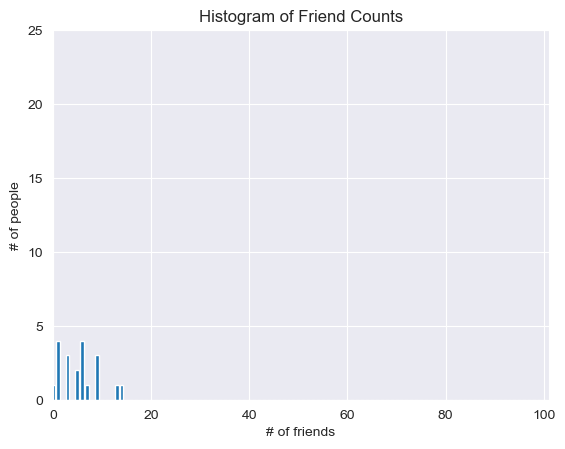

In [38]:


from collections import Counter

import matplotlib.pyplot as plt

num_friends = [
    0, 1, 1, 1, 1,
    3, 3, 3,
    5, 5,
    6, 6, 6, 6,
    7,
    9, 9, 9,
    13, 14
]


# First approach: put the friends counts into a histogram using Counter and plt.bar
friends_counts = Counter(num_friends)
xs = range(101)
ys = [friends_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]

### Central Tendencies
Usually, we'll want some notion of where our data is centered. Using the mean(average), which is the sum of the data divided by its count.

The mea is very sensitive to outliers. A generalization of the median is the quantile, which represents the value under which a certain percentile of the data lies (the median represents the value under which 50% of the data lies).

In [39]:
from typing import List

# mean
def mean(xs:List[float])-> float:
    return sum(xs) / len(xs)
mean(num_friends)

# Mode
def _median_odd(xs: List[float]) -> float:
    """if len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """if len(xs) is even, it is the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2          # e.g. len==4 → hi_midpoint==2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2   # ← fixed

def median(v: List[float]) -> float:
    """finds the middle-most value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)
assert median([1,10,2,9,5]) == 5
assert median([1,9,2,10]) == (2+9) / 2

# Compute the median number of friends
print(median(num_friends))

# Returns the pth-percentile value in x
def quantiles(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]
assert quantiles(num_friends, 0.10) == 1
assert quantiles(num_friends, 0.25) == 3
assert quantiles(num_friends, 0.75) == 9
assert quantiles(num_friends, 0.90) == 13


# Less commonly you might want to look at the mode, or most common value(s)
# Returns a list since there might be more than one mode
def mode(x: List[float])-> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]
assert set(mode(num_friends)) == {1,6}



5.5
